In [2]:
import vtk

In [3]:
%matplotlib inline
from dipy.reconst.dti import fractional_anisotropy, color_fa
from argparse import ArgumentParser
from scipy import ndimage
import os
import re
import numpy as np
import nibabel as nb
import sys
import matplotlib

# matplotlib.use('Agg')  # very important above pyplot import
import matplotlib.pyplot as plt

In [4]:
import pickle
with open("full_sample/v100/Hardy/tensor_streamlines.pkl", 'rb') as fibers:
    tensor_streamlines = pickle.load(fibers)

In [5]:
len(tensor_streamlines)

45295

In [6]:
import random
random.seed(9001)
r = 5000
import random
rlist = random.sample(range(1, len(tensor_streamlines)), r)
# print rlist

In [7]:
tensor_streamlines_100 = [tensor_streamlines[i] for i in rlist]
print len(tensor_streamlines_100)

5000


In [8]:
tensor_streamlines_trk = ((sl, None, None) for sl in tensor_streamlines)

In [9]:
# print len(tensor_streamlines_trk)

In [10]:
from argparse import ArgumentParser
from dipy.viz import window, actor
import numpy as np


def visualize(fibers, outf=None):
    """
    Takes fiber streamlines and visualizes them using DiPy
    Required Arguments:
        - fibers:
            fiber streamlines in a list as returned by DiPy
    Optional Arguments:
        - save:
            flag indicating whether or not you want the image saved
            to disk after being displayed
    """
    # Initialize renderer
    renderer = window.Renderer()

    # Add streamlines as a DiPy viz object
    stream_actor = actor.line(fibers)

    # Set camera orientation properties
    # TODO: allow this as an argument
    renderer.set_camera()  # args are: position=(), focal_point=(), view_up=()

    # Add streamlines to viz session
    renderer.add(stream_actor)

    # Display fibers
    # TODO: allow size of window as an argument
    window.show(renderer, size=(600, 600), reset_camera=False)

    # Saves file, if you're into that sort of thing...
    if outf is not None:
        window.record(renderer, out_path=outf, size=(600, 600))

In [11]:
visualize(tensor_streamlines_100)
# visualize(tensor_streamlines)

In [12]:
from IPython.display import Image
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    return Image(data)

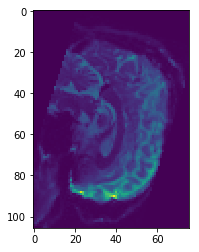

In [39]:
from PIL import Image
im = plt.imread('full_sample/v100/Hardy/ch0/fullsample40.tiff') 
plt.imshow(im)

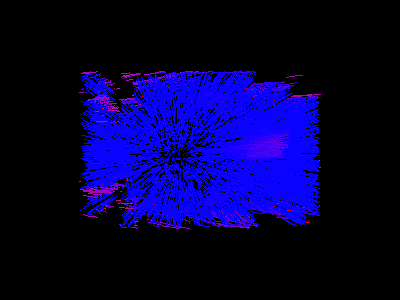

In [13]:
renderer = window.Renderer()

# Add streamlines as a DiPy viz object
stream_actor = actor.line(tensor_streamlines_100)
# Set camera orientation properties
# TODO: allow this as an argument
renderer.set_camera()  # args are: position=(), focal_point=(), view_up=()

# Add streamlines to viz session
renderer.add(stream_actor)

vtk_show(renderer)

In [14]:
from IPython.display import Image

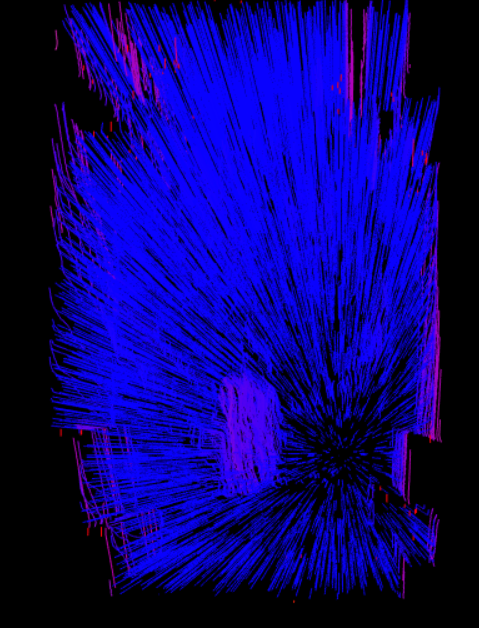

In [15]:
Image("Screenshots/vtk_hardy_face1.PNG", width=200, height=200)

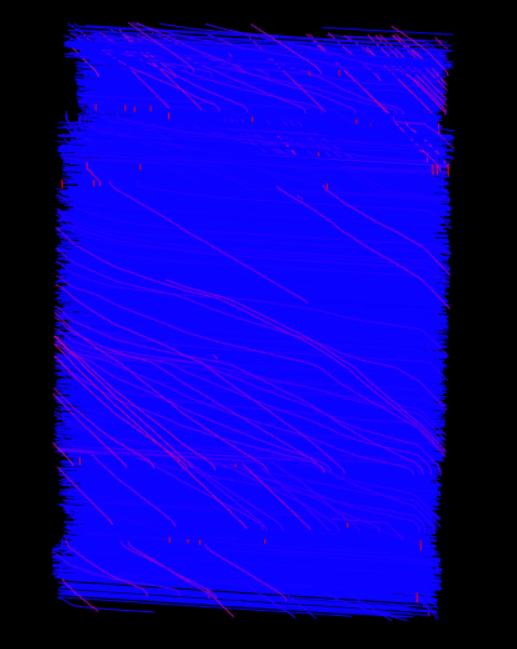

In [16]:
Image("Screenshots/vtk_hardy_face2.PNG", width=200, height=200)

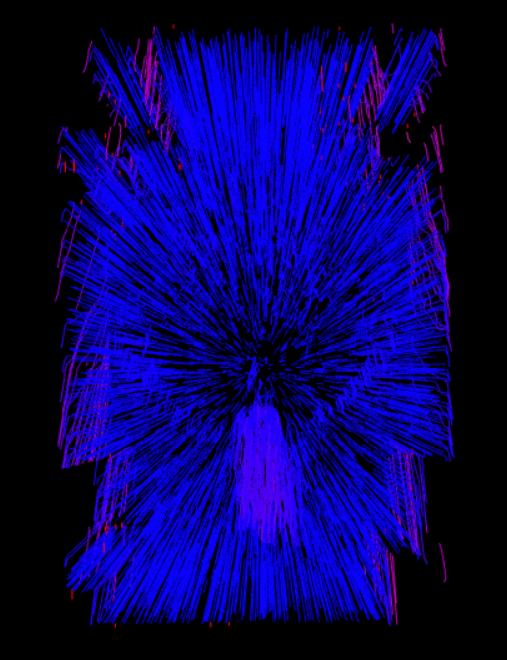

In [17]:
Image("Screenshots/vtk_hardy_face3.PNG", width=200, height=200)

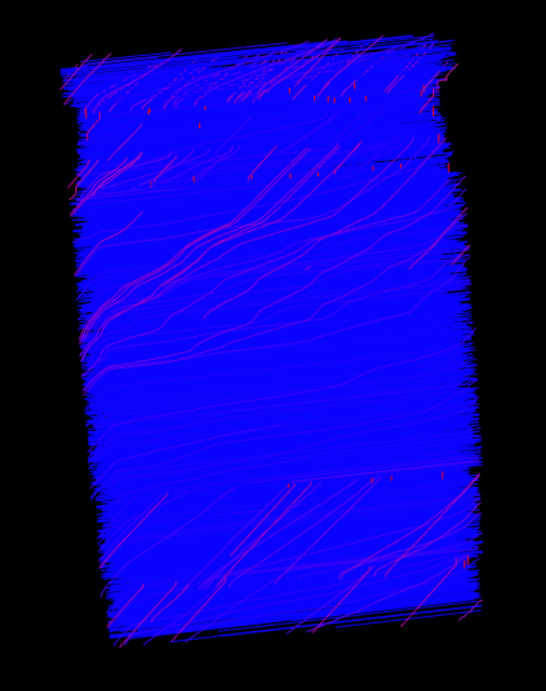

In [18]:
Image("Screenshots/vtk_hardy_face4.PNG", width=200, height=200)

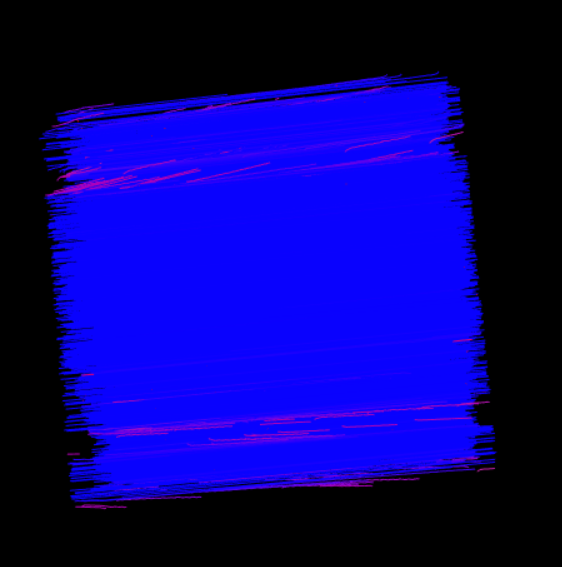

In [19]:
Image("Screenshots/vtk_hardy_top.PNG", width=200, height=200)

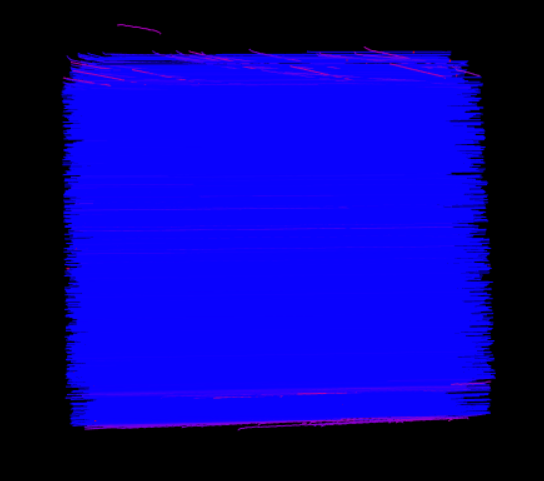

In [20]:
Image("Screenshots/vtk_hardy_bottom.PNG", width=200, height=200)

In [21]:
len(tensor_streamlines_100)

5000

In [22]:
def subregion(f):
    test = f
    print len(test)
    plt.figure(1)
    plt.subplots(figsize=(10, 10))
    plt.subplot(311)
    plt.title("Y-axis vs X-axis (" + str(len(test)) + " fibers)")
    for i in range(len(test)):
        plt.plot(test[i][:,0], test[i][:,1])
    plt.subplot(312)
    plt.title("Z-axis vs X-axis (" + str(len(test)) + " fibers)")
    for i in range(len(test)):
        plt.plot(test[i][:,0], test[i][:,2])
    plt.subplot(313)
    plt.title("Z-axis vs Y-axis (" + str(len(test)) + " fibers)")
    for i in range(len(test)):
        plt.plot(test[i][:,1], test[i][:,2])
    plt.tight_layout()
    plt.show()

5000


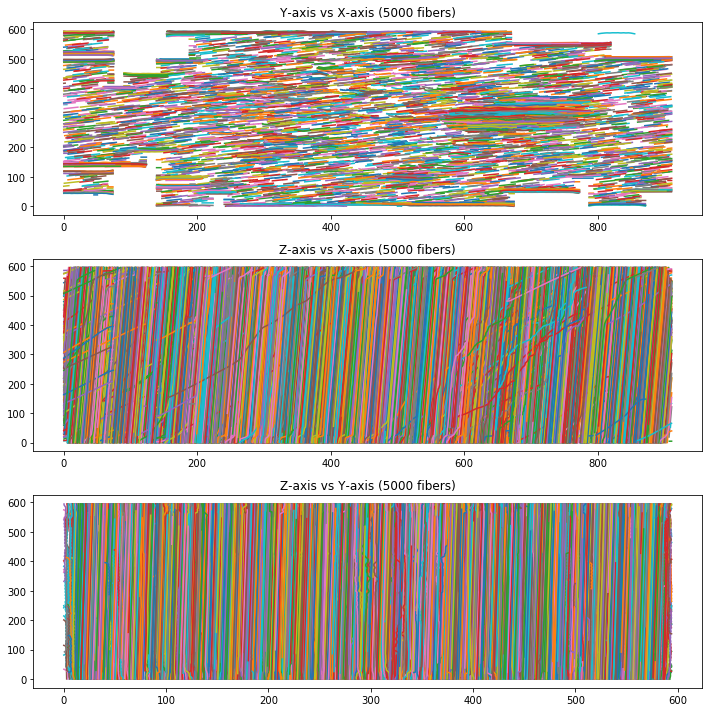

In [23]:
subregion(tensor_streamlines_100)

In [24]:
print len(tensor_streamlines)

45295


In [25]:
xfront = (100, 400)
yfront = (200, 400)
zfront = (0, 300)

front = []

for ind, fib in enumerate(tensor_streamlines):
    f = fib[0]
    if (f > [xfront[0], yfront[0], zfront[0]]).all() and (f < [xfront[1], yfront[1], zfront[1]]).all():
        front.append(ind)

print len(front)
fronts = [tensor_streamlines[i] for i in front]

536


536


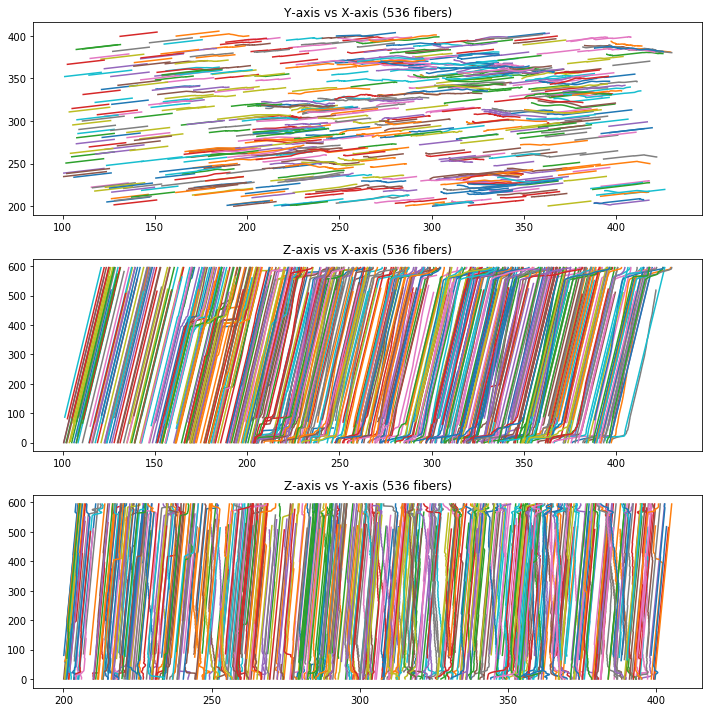

In [26]:
subregion(fronts)

In [27]:
xback = (600, 900)
yback = (200, 400)
zback = (0, 300)

back = []

for ind, fib in enumerate(tensor_streamlines):
    f = fib[0]
    if (f > [xback[0], yback[0], zback[0]]).all() and (f < [xback[1], yback[1], zback[1]]).all():
        back.append(ind)

print len(back)
backs = [tensor_streamlines[i] for i in back]

646


646


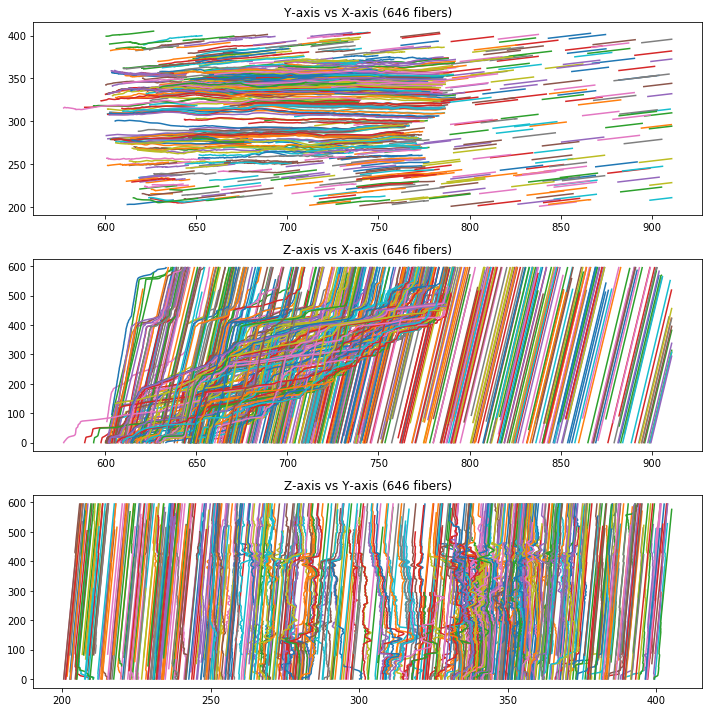

In [28]:
subregion(backs)

In [34]:
xftop = (0, 300)
yftop = (275, 325)
zftop = (300, 600)

ftop = []

for ind, fib in enumerate(tensor_streamlines):
    f = fib[0]
    if (f > [xftop[0], yftop[0], zftop[0]]).all() and (f < [xftop[1], yftop[1], zftop[1]]).all():
        ftop.append(ind)

print len(ftop)
ftops = [tensor_streamlines[i] for i in ftop]

1220


1220


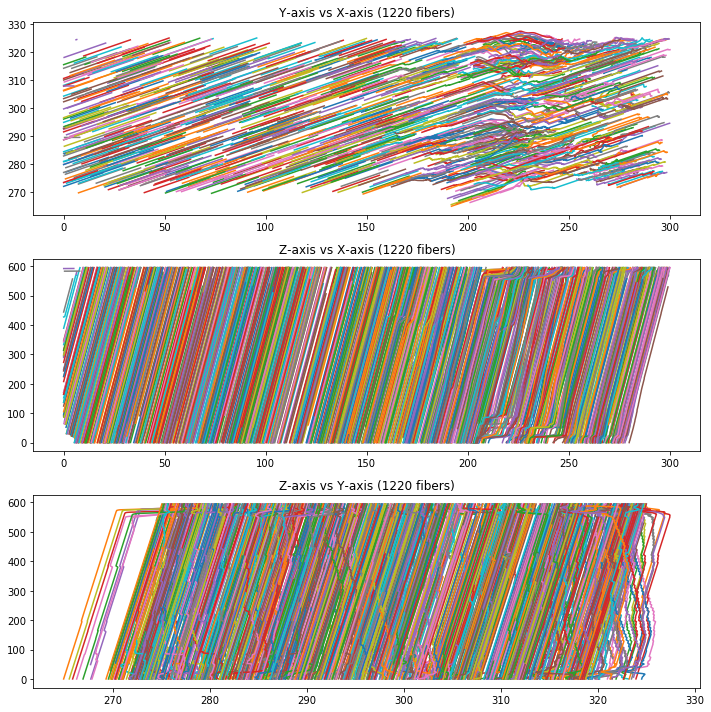

In [35]:
subregion(ftops)

In [36]:
xbtop = (600, 900)
ybtop = (275, 325)
zbtop = (300, 600)

btop = []

for ind, fib in enumerate(tensor_streamlines):
    f = fib[0]
    if (f > [xbtop[0], ybtop[0], zbtop[0]]).all() and (f < [xbtop[1], ybtop[1], zbtop[1]]).all():
        btop.append(ind)

print len(btop)
btops = [tensor_streamlines[i] for i in btop]

2099


2099


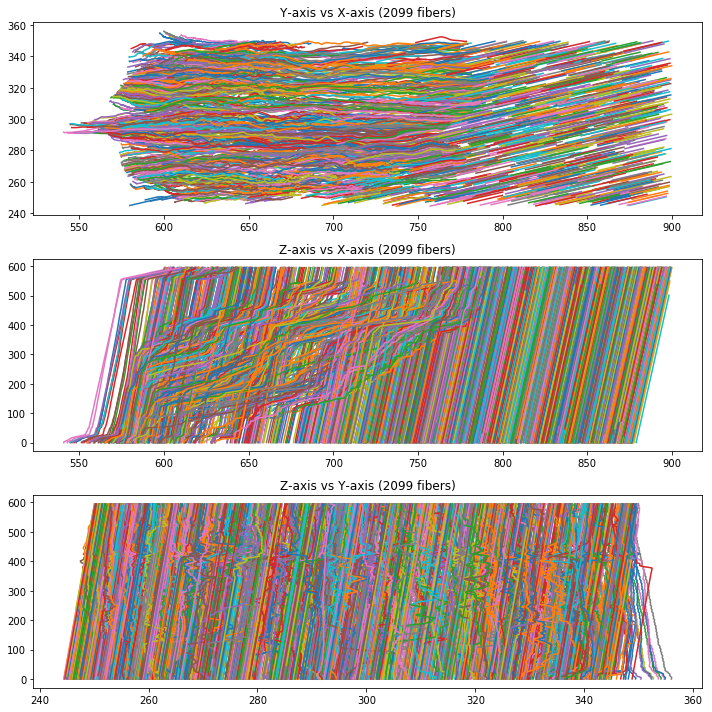

In [37]:
subregion(btops)